<a href = "https://ds.codeup.com/classification/evaluation/#exercises">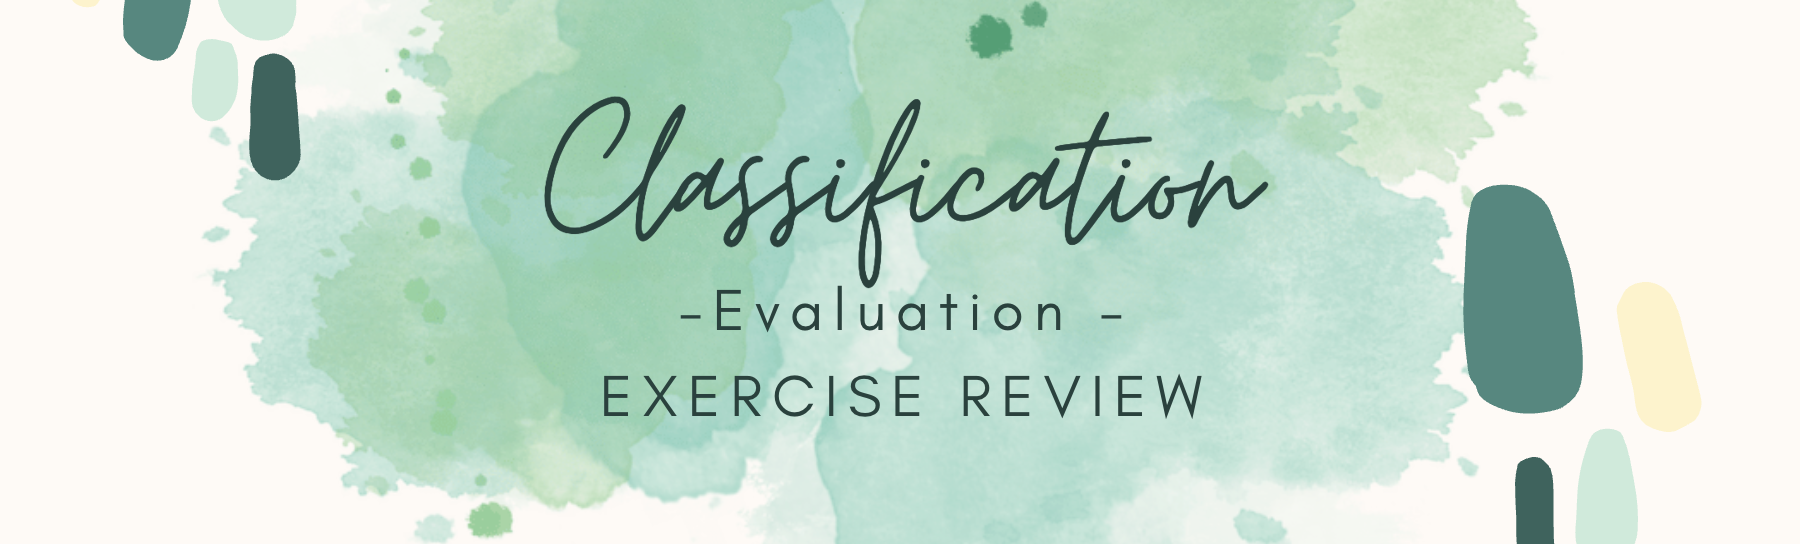</a>

In [8]:
import pandas as pd
import seaborn as sns

# 1. Create a new file named model_evaluation.py or model_evaluation.ipynb for these exercises.

# 2. Given the following confusion matrix, evaluate (by hand) the model's performance.

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


- positive class: Dog pic

- negative class: Cat pic

## 2.1  In the context of this problem, what is a false positive?

**FP**: We predict dog & the pic is actually a cat

## 2.2  In the context of this problem, what is a false negative?

**FN**: We predict cat & the pic is actually a dog

## 2.3  How would you describe this model?

In [1]:
#TP: We predict dog & it's actually a dog
tp = 46
#TN: We predict cat & it's actually a cat
tn = 34
#FP: We predict dog & it's actually a cat
fp = 13
#FN: We predict cat & it's actually a dog
fn = 7

In [2]:
print("Dog-classifier (where 'DOG' is the positive prediction)")

print("True Positives:", tp)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Negatives:", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)

print("Accuracy is:", accuracy)
print("Recall is:", round(recall,2))
print("Precision is:", round(precision,2))

Dog-classifier (where 'DOG' is the positive prediction)
True Positives: 46
False Positives: 13
False Negatives: 7
True Negatives: 34
-------------
Accuracy is: 0.8
Recall is: 0.87
Precision is: 0.78


In [6]:
accuracy = (tp + tn) / (tp + tn + fp + fn)

recall = tp / (tp + fn)

precision = tp / (tp + fp)

print(f"""Dog-classifier (where 'DOG' is the positive prediction)

True Positives: {tp}
False Positives: {fp}
False Negatives: {fn}
True Negatives: {tn}
______________________

Baseline is: Dog - highest frequency
Accuracy is: {accuracy}
Recall is: {recall}
Precision is: {precision}
""")

Dog-classifier (where 'DOG' is the positive prediction)

True Positives: 46
False Positives: 13
False Negatives: 7
True Negatives: 34
______________________

Baseline is: Dog - highest frequency
Accuracy is: 0.8
Recall is: 0.8679245283018868
Precision is: 0.7796610169491526



# 3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions <a href = "https://ds.codeup.com/data/c3.csv">can be found here</a>.

## 3.1  An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a **defect** as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [9]:
#bring in the csv provided in the curriculum exercises
#cody_df = pd.read_csv('~/Downloads/c3.csv')
cody_df = pd.read_csv('c3.csv')

In [11]:
#take a look at the data
cody_df.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


In [12]:
#what kind of columns and dtypes are we dealing with?
cody_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  200 non-null    object
 1   model1  200 non-null    object
 2   model2  200 non-null    object
 3   model3  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [13]:
#how many defects and non-defects do we have in the actual data?
cody_df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

Since we are interested in 'defects', we will asssign it as 'positive class' for the classifier.
<br>
- defects = positive class
<br>

Quality Control, our internal customer, wants the metric to identify as many defective ducks as possible
<br>

Our best metric for Quality Control here is <b>recall</b>
<br>

- i.e how many real positives do we have?
- i.e how many of defective ducks are actually flagged by defective (positive) by the models?
- i.e let's minimize our false negatives


<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
Recall is about real positives: subset `df.actual == "positive"`
<br>
<br>
recall = tp/(tp+fn)
<br>
<br>    
    false negative is when we say it's not defective, but it is 
</div>

In [14]:
# Model positives
subset = cody_df [cody_df.actual == 'Defect']
subset

,actual,model1,model2,model3
13,Defect,No Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
74,Defect,No Defect,No Defect,Defect
87,Defect,No Defect,Defect,Defect
118,Defect,No Defect,Defect,No Defect
135,Defect,Defect,No Defect,Defect
140,Defect,No Defect,Defect,Defect
147,Defect,Defect,No Defect,Defect


In [16]:
#Model 1 recall
model1_recall = (subset.actual == subset.model1).mean()

# Model 2 recall
model2_recall = (subset.actual == subset.model2).mean()

# Model 3 recall
model3_recall = (subset.actual == subset.model3).mean()

print(f"""Model 1 Recall: {model1_recall:.2%}
Model 2 Recall: {model2_recall:.2%}
Model 3 Recall: {model3_recall:.2%}
""")

Model 1 Recall: 50.00%
Model 2 Recall: 56.25%
Model 3 Recall: 81.25%



## 3.2 Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. 
The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to **predict which ducks will have defects**, but tell you they really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. 
<br>
Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

- positive case = defect 
- negative case = no defect

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
false positive is when we say its defective, but it is not
<br>
<br>
false negative is when we say not defective, but it is
<br>
<br>    
precision = tp / (tp + fp)
</div>

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
PR team really wants to minimize the False positives - meaning choose model with highest precision.
</div>

In [17]:
# choose subset of model1 where we only select 'positive predictions'
subset = cody_df [cody_df.model1 == 'Defect']
subset

,actual,model1,model2,model3
3,No Defect,Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
62,No Defect,Defect,No Defect,No Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
135,Defect,Defect,No Defect,Defect
147,Defect,Defect,No Defect,Defect
163,Defect,Defect,Defect,Defect
194,Defect,Defect,No Defect,Defect
196,Defect,Defect,No Defect,No Defect


In [18]:
#Model 1 precision
model1_precision = (subset.actual == subset.model1).mean()


# choose subset for model2 where we only select 'positive predictions'
subset2 = cody_df [cody_df.model2 == 'Defect']
# calculate precision
model2_precision = (subset2.actual == subset2.model2).mean()


# choose subset for model3 where we only select 'positive predictions'
subset3 = cody_df [cody_df.model3 == 'Defect']
# calculate precision
model3_precision = (subset3.actual == subset3.model3).mean()

print(f"""Model 1 Precision: {model1_precision:.2%}
Model 2 Precision: {model2_precision:.2%}
Model 3 Precision: {model3_precision:.2%}
""")

Model 1 Precision: 80.00%
Model 2 Precision: 10.00%
Model 3 Precision: 13.13%



<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
        Use model 1 since it will minimize the false positive predictions of defects
        </div>

# 4. You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats *(or both for an additional fee)*.

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. 
- First an automated algorithm tags pictures as either a cat or a dog (Phase I). 
- Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can <a href = "https://ds.codeup.com/data/gives_you_paws.csv">find their results here</a>.

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

In [19]:
paws_df = pd.read_csv('gives_you_paws.csv')

In [20]:
#take a look at the data
paws_df.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


In [21]:
#what kind of columns and dtypes are we dealing with?
paws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  5000 non-null   object
 1   model1  5000 non-null   object
 2   model2  5000 non-null   object
 3   model3  5000 non-null   object
 4   model4  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [22]:
#what are our actual counts
paws_df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
It looks like in out actual data collection, there are almost twice as many dog samples
        </div>

In [23]:
paws_df.actual.value_counts().idxmax()

'dog'

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
-- .idxmax() returns the value with the maximum count.
<br>
    -- we can set this as the baseline 'model'
</div>

In [24]:
#set the most common class ('dog') as the baseline
paws_df['baseline'] = paws_df.actual.value_counts().idxmax()

## 4a. In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

- dog = positive class
- cat = negative class

In [23]:
#baseline accuracy 
(paws_df.actual == paws_df.baseline).mean()

0.6508

In [24]:
#model 1 accuracy
(paws_df.model1 == paws_df.actual).mean()

0.8074

In [25]:
#model 2 accuracy
(paws_df.model2 == paws_df.actual).mean()

0.6304

In [26]:
#model 3 accuracy
(paws_df.model3 == paws_df.actual).mean()

0.5096

In [27]:
#model 4 accuracy
(paws_df.model4 == paws_df.actual).mean()

0.7426

In [26]:
paws_df.columns

Index(['actual', 'model1', 'model2', 'model3', 'model4', 'baseline'], dtype='object')

In [28]:
print(paws_df.columns[1])

model1


In [30]:
#let's put it all together
model_acc = []

for model in paws_df.columns[1:]:
    acc = (paws_df.actual == paws_df[model]).mean()
    model_acc.append([model, acc])

model_acc

[['model1', 0.8074],
 ['model2', 0.6304],
 ['model3', 0.5096],
 ['model4', 0.7426],
 ['baseline', 0.6508]]

In [31]:
#make pretty in df
pd.DataFrame(model_acc, columns=['model','accuracy'])

,model,accuracy
0,model1,0.8074
1,model2,0.6304
2,model3,0.5096
3,model4,0.7426
4,baseline,0.6508


<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
In terms of accuracy, model 1 and model 4 perform better than baseline
</div>

## 4b. Suppose you are working on a team that solely deals with **dog pictures**. Which of these models would you recommend?

- dog = positive class
- cat = negative class

<b>Phase I</b>: Automated algorithm tags pictures as either a cat or a dog
<br>
For Phase I, we should choose a model with highest Recall

<b>Phase II</b>: Photos that have been initially identified are put through another round of review
<br>
People have a service to see dog pictures, so what do we want to minimize?
- we want to minimize false positives
<br>
Precision is the appropriate metric since we are trying to minimize false positives

## 4c. Suppose you are working on a team that solely deals with **cat pictures**. Which of these models would you recommend?    

- cat = positive class
- dog = negative class

We want to minimize the false positives, therefore, we will use precision again.

# 5. Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem .

- <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">`sklearn.metrics.accuracy_score`</a>
- <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html">`sklearn.metrics.precision_score`</a>
- <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html">`sklearn.metrics.recall_score`</a>
- <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">`sklearn.metrics.classification_report`</a>

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import precision_score, recall_score